# Climate Analysis
---

## Import Dependencies

In [1]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy as core
import sqlalchemy.orm as orm
from sqlalchemy.ext.automap import automap_base

In [2]:
# Matplotlib Graphing

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# Data Manipulation/Analysis

import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLAlchemy ORM

In [4]:
# Create engine to hawaii.sqlite
engine = core.create_engine('sqlite:///Resources/hawaii.sqlite')

In [5]:
# Creating an Inspector to help
inspector = core.inspect(engine)

### Measurement Table - Columns

In [6]:
measurement_col = inspector.get_columns('measurement')

for column in measurement_col:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


### Station Table - Columns

In [7]:
station_col = inspector.get_columns('station')

for column in station_col:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


### AutoMapping to Base Inst.

In [8]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(autoload_with = engine)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

### Session Creation

In [11]:
# Create our session config (link) from Python to the DB
Session = orm.sessionmaker(bind = engine)

## Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
with Session() as session:
    first_date = session.query(
        core.func.max(Measurement.date)
        ).scalar()

first_date = dt.datetime.strptime(first_date, '%Y-%m-%d')
print(first_date)

2017-08-23 00:00:00


### Query - Precipitation Last Year

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_date = first_date - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
sel = [
    Measurement.date
    ,Measurement.prcp
]

with Session() as session:
    data = session.query(*sel
        ).filter(Measurement.date <= first_date
        ).filter(Measurement.date >= last_date
        ).all()

In [43]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(data
    ).rename(
        columns = {
            'date': 'Date'
            ,'prcp': 'Precipitation'
        }
    ).dropna(how = 'any')

prcp_df['Date'] = pd.to_datetime(prcp_df['Date'])

# Sort the dataframe by date
prcp_df = prcp_df.sort_values('Date').copy()

prcp_df

,Date,Precipitation
0,2016-08-24,0.08
1188,2016-08-24,1.22
702,2016-08-24,2.28
1875,2016-08-24,1.45
360,2016-08-24,2.15
...,...,...
2221,2017-08-22,0.50
359,2017-08-23,0.00
1523,2017-08-23,0.08
1005,2017-08-23,0.00


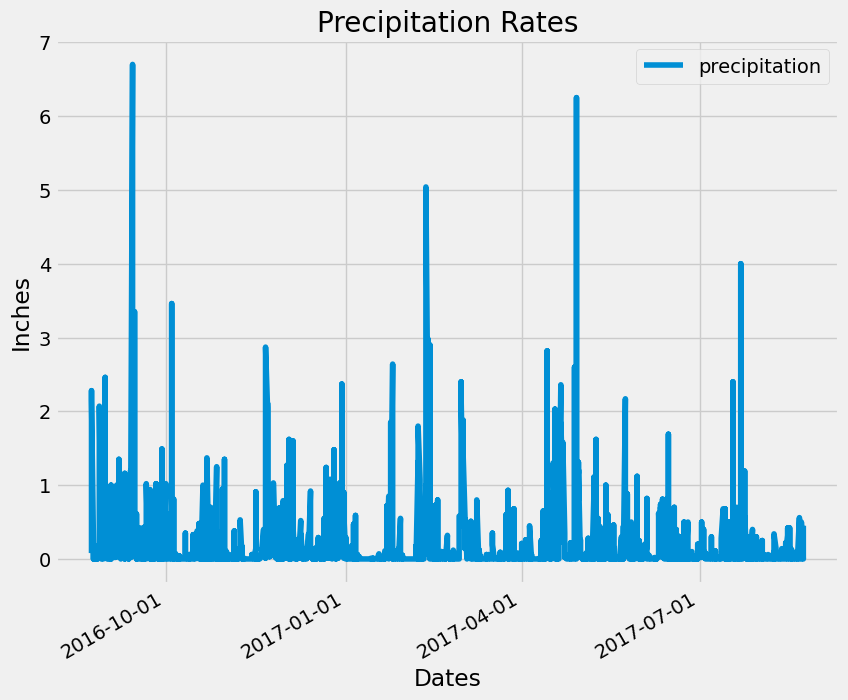

In [34]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (9, 8))

ax.plot(
    prcp_df['Date']
    ,prcp_df['Precipitation']
    ,label = 'precipitation'
)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Automatically rotate and align the tick labels
fig.autofmt_xdate()
plt.legend(loc = 'best')
plt.xlabel('Dates')
plt.ylabel('Inches')
plt.title('Precipitation Rates')

plt.show()

In [44]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.set_index('Date', drop = True).describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
with Session() as session:
    data = session.query(core.func.count(Station.id)).scalar()

print(
    f'Number of Stations: {data}'
)

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

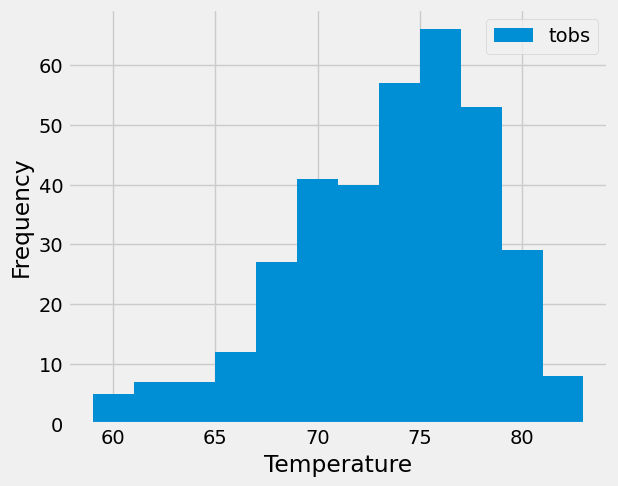

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Close Session

In [46]:
# Close Session
session.close()

# Dispose Engine
engine.dispose()